In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('houseprice.csv')

In [3]:
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# 널 값이 0보다 큰 것만 보는 과정
isnull_series = df.isnull().sum()

In [6]:
isnull_series[isnull_series>0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

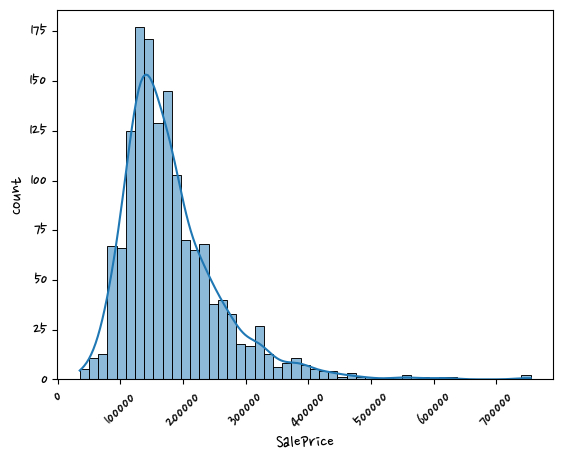

In [7]:
plt.xticks(rotation=45)
# 10개의 구간에서 타겟 값의 분포도가 정규 분포인지 확인
# 타겟 값이 
sns.histplot(df['SalePrice'],kde=True)

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

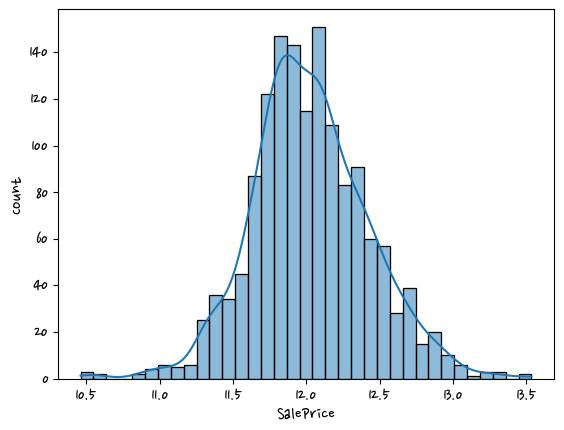

In [8]:
# 로그처리하여 정규 분포가 아닌 결과값을 정규 분포 형태로 변환해준다. 
# 넘파이의 logIp()를 이용해 로그 변환 결과값을 기반으로 학습
log_saleprice = np.log1p(df['SalePrice'])
sns.histplot(log_saleprice,kde=True)

In [9]:
# 앞에서 5개 제거

In [12]:
original_saleprice = df['SalePrice']
df['SalePrice'] = np.log1p(df['SalePrice'])
df.drop(columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','Id'],inplace=True)

In [ ]:
df.fillna(df.mean(),inplace=True)

In [ ]:
null_colum_count = df.isnull().sum()[df.isnull]

In [ ]:
df.shape

In [ ]:
df_ohe = pd.get_dummies(df)

In [ ]:
df_ohe.shape

In [ ]:
def get_rmse(model):
    from sklearn.metrics import mean_squared_error
    import numpy as np
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, '로그 변환된 RMSE:', np.round(rmse, 3))
    return rmse

def get_rmse(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# 회귀 계수는 누적 되면 과적합 됐을 때 모델 정확도는 높아지는데 오히려
# 실제 데이터로 예측 해봤을 때 안좋은 모델이 될 수도 있다. 
# 그래서 위의 임포트 들로 과적합을 막기휘한 제한을 준다.
from sklearn.model_selection import train_test_split

In [ ]:
# 로그처리가 된 df를 각각 변수에 넣어주고
y = df_ohe['SalePrice']
x = df_ohe.drop(columns=['SalePrice'])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=156)

In [ ]:
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)

In [ ]:
ridge_reg = Ridge()
ridge_reg.fit(X_train,y_train)

In [ ]:
lasso_reg = Lasso()
lasso_reg.fit(X_train,y_train)

In [ ]:
np.expm1(0.13189576579154494)

In [ ]:
def get_top_botton_coef(model,n=10):
    coef = pd.Series(model.coef_,index=X.columns)
    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)
    return coef_high,coef_low

In [ ]:
get_top_botton_coef(lr_reg,3)

In [ ]:
def visualize_coefficient(models):
    fig,axs = plt.subplots(figsize=(24,10),nrows=1,ncols=3)
    fig.tight_layout()
    for i_num,model in enumerate(models):
        # 상위 몇개 하위 몇개 가져옴
        coef_high,coef_low = get_top_botton_coef(model)
        # 하나로 붙어서 나오게 만듬
        coef_concat = pd.concat([coef_high,coef_low])
        # 이걸 호출할 때 0, 1, 2 호출 된다.
        axs[i_num].set_title(model.__class__.__name__+ 'Coefficient',size=25)
        # pad 값을 기준으로 앞 뒤 들여쓰기 조정 
        axs[i_num].tick_params(axis='y', direction='in', pad=-120)
        for label in (axs[i_num].get_xticklables()+axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i_num])

visualize_coefficient(models)
model = [lr_reg, ridge_reg, lasso_reg]

In [ ]:
# 결과값에서 rasso는 다른 형태 보인다.
# p.383 - 교차검증 해봐야함.

In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
def get_avg_rmse_cv(models):
    for model in models:
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target,
                                             scoring="neg_mean_squared_error", cv=5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format(model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format(model.__class__.__name__, np.round(rmse_avg, 3)))

In [15]:
get_avg_rmse_cv(models)

NameError: name 'models' is not defined

In [16]:
from sklearn.model_selection import GridSearchCV

In [ ]:
def print_best_params(model, params):
    grid_model = GridSearchCV(model,params,
                              # 원본값과의 차이값의 제곱의 합??
                             scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X, y)
    rmse = np,sqrt(-1*grid_model.best_score_)
    print(f'{model.__class__.__name__} 5 cv시 최적 평균 rmse 값:{np.round(rmse,4)}, 최적 alpha값:{grid_model.best_params}')

In [17]:
print_best_params = {
    'alpha':[0.05,0.1,1,5,8,10,12,15,20]
}
print_best_params(ridge_reg,ridge_param)

NameError: name 'ridge_reg' is not defined

In [ ]:
lasso_params = {
    'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]
}
print_best_params(lasso_reg, lasso_param)

In [ ]:
r_reg = LinearRegression()
lr_reg.fit(X_train,y_train)

In [ ]:
ridge_reg = Ridge()
ridge_reg.fit(X_train,y_train)

In [ ]:
lasso_reg = Lasso()
lasso_reg.fit(X_train,y_train)

In [ ]:
models=[lr_reg,ridge_reg,lasso_reg]
get_rmses(models)

visualize_coefficient(models)